In [1]:
#importing the necessary libraries and displaying the data head
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#importing the data set and parsing the date columns so python can recognize it as a date column
data = pd.read_csv("Building_Permits-1.csv", parse_dates=["Permit Creation Date", "Current Status Date", "Filed Date", "Issued Date", "Completed Date", "First Construction Document Date", "Permit Expiration Date"])
data.head()


//anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [2]:
data.nunique()

Permit Number                             181495
Permit Type                                    8
Permit Type Definition                         8
Permit Creation Date                        1291
Block                                       4896
Lot                                         1055
Street Number                               5099
Street Number Suffix                          18
Street Name                                 1704
Street Suffix                                 21
Unit                                         660
Unit Suffix                                  164
Description                               134272
Current Status                                14
Current Status Date                         1307
Filed Date                                  1288
Issued Date                                 1289
Completed Date                              1300
First Construction Document Date            1288
Structural Notification                        1
Number of Existing S

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           198900 non-null  object        
 1   Permit Type                             198900 non-null  int64         
 2   Permit Type Definition                  198900 non-null  object        
 3   Permit Creation Date                    198900 non-null  datetime64[ns]
 4   Block                                   198900 non-null  object        
 5   Lot                                     198900 non-null  object        
 6   Street Number                           198900 non-null  int64         
 7   Street Number Suffix                    2216 non-null    object        
 8   Street Name                             198900 non-null  object        
 9   Street Suffix                        

In [4]:
#Preserving the original data by making a copy
data1=data.copy()

In [5]:
'''Dropping Columns that have too much null values to perform analysis on'''

df = data1.drop(columns = ["Site Permit", "Voluntary Soft-Story Retrofit", "TIDF Compliance",
                          "Fire Only Permit", "Completed Date", "Unit Suffix", "Street Number Suffix",
                           "Structural Notification", "Unit"])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Permit Number                           198900 non-null  object        
 1   Permit Type                             198900 non-null  int64         
 2   Permit Type Definition                  198900 non-null  object        
 3   Permit Creation Date                    198900 non-null  datetime64[ns]
 4   Block                                   198900 non-null  object        
 5   Lot                                     198900 non-null  object        
 6   Street Number                           198900 non-null  int64         
 7   Street Name                             198900 non-null  object        
 8   Street Suffix                           196132 non-null  object        
 9   Description                          

## Uni-Variate Analysis

In [7]:
# displaying the occurrance of each variable in a column
for i in df:
    a = df[i].value_counts()
    print("--------"*25)
    print(i)
    print()
    print(a)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Permit Number

201602179765    101
201602179758     66
201602179775     30
201708165004      9
201702239990      9
               ... 
201503312390      1
201604013769      1
201706219926      1
201311010939      1
M841907           1
Name: Permit Number, Length: 181495, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Permit Type

8    178844
3     14663
4      2892
2       950
6       600
7       511
1       349
5        91
Name: Permit Type, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Existing Construction Type Description

wood frame (5)    113350
constr type 1      28072
constr type 3       9663
constr type 2       4068
constr type 4        381
Name: Existing Construction Type Description, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Proposed Construction Type

5.0    114382
1.0     27841
3.0      9360
2.0      3778
4.0       377
Name: Proposed Construction Type, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Proposed Construction Type D

In [8]:
df['year'] = df["Permit Creation Date"].dt.year
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,year
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,2015
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,2016
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,installation of separating wall,...,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,2016
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,2016
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,2016


In [9]:
#Frequency of the year column
df.year.value_counts()

2017    41156
2015    40150
2016    39721
2014    36686
2013    35228
2018     5937
2012       22
Name: year, dtype: int64

In [10]:
### defining a function to get the difference between two date on the same row
def get_month(month_a, month_b):
    bam = (month_a - month_b)
    return bam

In [11]:
#checking if the function works
get_month(df['Issued Date'], df['Permit Creation Date'])

0        187 days
1        471 days
2             NaT
3        253 days
4        368 days
           ...   
198895     0 days
198896     1 days
198897     0 days
198898     0 days
198899     0 days
Length: 198900, dtype: timedelta64[ns]

In [12]:
#Running the function
df['days_to_issue'] = get_month(df['Issued Date'], df['Filed Date'])

In [13]:
#.dt.days is a function that keeps the values as days
df["days_to_issue"]=df.days_to_issue.dt.days

In [14]:
#Frequency of wait time to get a Building Permit
df.days_to_issue.value_counts()

0.0       115488
1.0         8364
2.0         3410
3.0         3247
7.0         2799
           ...  
927.0          1
703.0          1
916.0          1
1142.0         1
926.0          1
Name: days_to_issue, Length: 984, dtype: int64

In [15]:
#Statistical Analysis on wait time to get a Building Permit
df.days_to_issue.describe()

count    183960.000000
mean         26.054697
std          91.061716
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1740.000000
Name: days_to_issue, dtype: float64

## Multi-Variate Analysis

In [16]:
df.groupby("year", sort=True).agg({"days_to_issue":['count', 'mean', 'max', 'min']})

days_to_issue                        
             count       mean     max  min
year                                      
2012            21  65.380952    79.0  0.0
2013         33859  26.436782  1740.0  0.0
2014         34922  31.836951  1421.0  0.0
2015         38003  33.630266  1071.0  0.0
2016         36730  28.612769   750.0  0.0
2017         35912  12.420110   404.0  0.0
2018          4513   2.146466    49.0  0.0

In [17]:
#Creating a Column to find to subtract Number of Existing Stories from Number of Proposed Stories
#In other to get a difference between both variable to understand if an Upgrade took place

df['Stories_check'] = df['Number of Proposed Stories'] - df['Number of Existing Stories']
df['Stories_check'].head()


0    NaN
1    NaN
2    0.0
3    0.0
4    NaN
Name: Stories_check, dtype: float64

In [18]:
#Defining a function to differenciate between an upgrade and or Stale/Downgrade

def stories_difference(x):
    if x > 0:
        return 'Increase in Building Story'
    elif x < 0:
        return 'Decrease in Building Story'
    else:
        return 'Stale in Building Story'




In [19]:
#Creating a column to run the defined function
df['Stories_Class'] = df['Stories_check'].apply(lambda x: stories_difference(x))
df['Stories_Class'].value_counts()

Stale in Building Story       195963
Increase in Building Story      2847
Decrease in Building Story        90
Name: Stories_Class, dtype: int64

In [20]:
# Data to compare the upgrade and Stale/Downgrade to specific years

df.groupby('year').agg({"Stories_Class":"count"})

year_per_Stories_Class = pd.crosstab(index = df.year, columns = df["Stories_Class"], 
                                 margins = True, margins_name= "Total")
year_per_Stories_Class

Stories_Class,Decrease in Building Story,Increase in Building Story,Stale in Building Story,Total
year,,,,
2012,0,0,22,22
2013,15,459,34754,35228
2014,13,533,36140,36686
2015,14,642,39494,40150
2016,32,599,39090,39721
2017,14,544,40598,41156
2018,2,70,5865,5937
Total,90,2847,195963,198900


In [21]:
# Data to compare the Year to Current Status

year_per_Current_Status = pd.crosstab(index = df.year, columns = df["Current Status"], 
                                 margins = True, margins_name= "Total")
year_per_Current_Status

Current Status,appeal,approved,cancelled,complete,disapproved,expired,filed,incomplete,issued,plancheck,reinstated,revoked,suspend,withdrawn,Total
year,,,,,,,,,,,,,,,
2012,0,0,0,21,0,0,1,0,0,0,0,0,0,0,22
2013,0,58,345,21069,0,573,936,0,11836,1,97,7,40,266,35228
2014,0,62,410,21229,1,420,1180,0,12824,2,129,12,27,390,36686
2015,0,129,307,21665,0,250,1527,0,15717,3,99,8,31,414,40150
2016,2,218,289,19293,0,126,2202,1,16895,9,130,13,43,500,39721
2017,0,261,183,13376,1,1,4789,0,22220,1,100,10,40,174,41156
2018,0,5,2,424,0,0,1408,1,4067,0,8,0,12,10,5937
Total,2,733,1536,97077,2,1370,12043,2,83559,16,563,50,193,1754,198900


In [22]:
# Data to compare the Permit Type Definition to Current Status
Permit_Type_Definition_per_Current_Status = pd.crosstab(index = df["Current Status"], 
                                                        columns = df["Permit Type Definition"] , 
                                                        margins = True, margins_name= "Total")
Permit_Type_Definition_per_Current_Status

Permit Type Definition,additions alterations or repairs,demolitions,grade or quarry or fill or excavate,new construction,new construction wood frame,otc alterations permit,sign - erect,wall or painted sign,Total
Current Status,,,,,,,,,
appeal,2,0,0,0,0,0,0,0,2
approved,611,42,6,16,17,19,15,7,733
cancelled,279,5,0,2,7,1120,104,19,1536
complete,5008,170,46,37,305,90432,976,103,97077
disapproved,0,0,0,0,0,1,1,0,2
expired,72,2,0,0,0,1273,21,2,1370
filed,3643,154,6,144,290,7336,357,113,12043
incomplete,0,0,0,0,0,2,0,0,2
issued,4190,198,32,136,275,77101,1373,254,83559


In [23]:
# Data to compare the Year to Permit Type Definition
year_per_Permit_Type_Definition = pd.crosstab(index = df.year, columns = df["Permit Type Definition"], 
                                 margins = True, margins_name= "Total")
year_per_Permit_Type_Definition

Permit Type Definition,additions alterations or repairs,demolitions,grade or quarry or fill or excavate,new construction,new construction wood frame,otc alterations permit,sign - erect,wall or painted sign,Total
year,,,,,,,,,
2012,1,0,0,0,17,4,0,0,22
2013,2441,100,41,54,160,31717,639,76,35228
2014,2481,141,14,65,233,33070,575,107,36686
2015,3245,111,10,66,302,35788,528,100,40150
2016,3183,125,11,99,132,35533,547,91,39721
2017,2930,108,15,61,89,37311,525,117,41156
2018,382,15,0,4,17,5421,78,20,5937
Total,14663,600,91,349,950,178844,2892,511,198900


In [24]:
# Analysis between Neighbourhood and Revised Cost
df.groupby("Neighborhoods - Analysis Boundaries").agg({"Revised Cost":["mean", "max"]}, ascending=True)

Revised Cost             
                                              mean          max
Neighborhoods - Analysis Boundaries                            
Bayview Hunters Point                270525.523801   39567908.0
Bernal Heights                        82143.712068    3000000.0
Castro/Upper Market                   43116.568908   20000000.0
Chinatown                             91994.478628   27676322.0
Excelsior                             44115.590965   67000000.0
Financial District/South Beach       353051.319123  520000000.0
Glen Park                             37074.766961    1200000.0
Golden Gate Park                     220990.425000    5500000.0
Haight Ashbury                        29873.662644   15000000.0
Hayes Valley                         100580.774494   48723500.0
Inner Richmond                        31394.267379    8973490.0
Inner Sunset                          30146.694974    3000000.0
Japantown                            277655.651458    5200000.0
Lakeshore                            430646.282113  131000000.0
Lincoln Park                          21210.321633     336838.0
Lone Mountain/USF                     38977.936533    6250000.0
Marina                                42546.191450   15000000.0
McLaren Park                          23633.083182     300000.0
Mission                              163284.383735  400000000.0
Mission Bay                          990469.079358  780500000.0
Nob Hill                              64922.261679   39000000.0
Noe Valley                            35511.371220    2890000.0
North Beach                           62367.954941    6750000.0
Oceanview/Merced/Ingleside            44573.134796   15000000.0
Outer Mission                         32414.908155    5050000.0
Outer Richmond                        29047.153102    6133912.0
Pacific Heights                       53559.887893   62000000.0
Portola                               23821.306558     724752.0
Potrero Hill                         278282.209776  191000000.0
Presidio                             102303.490196    2308000.0
Presidio Heights                      43458.111760    3600000.0
Russian Hill                          37582.752558    9300000.0
Seacliff                              49826.406081    3700000.0
South of Market                      318721.011175  266061486.0
Sunset/Parkside                       28254.848342   30000000.0
Tenderloin                           283186.852285  143982500.0
Treasure Island                      303125.246711   15000000.0
Twin Peaks                            41689.322538   10400000.0
Visitacion Valley                     53986.297893   22423200.0
West of Twin Peaks                    29358.145183    8200000.0
Western Addition                     182064.242844  105000000.0

## Visual Exploration

Text(0.5, 1.0, 'Current Status')

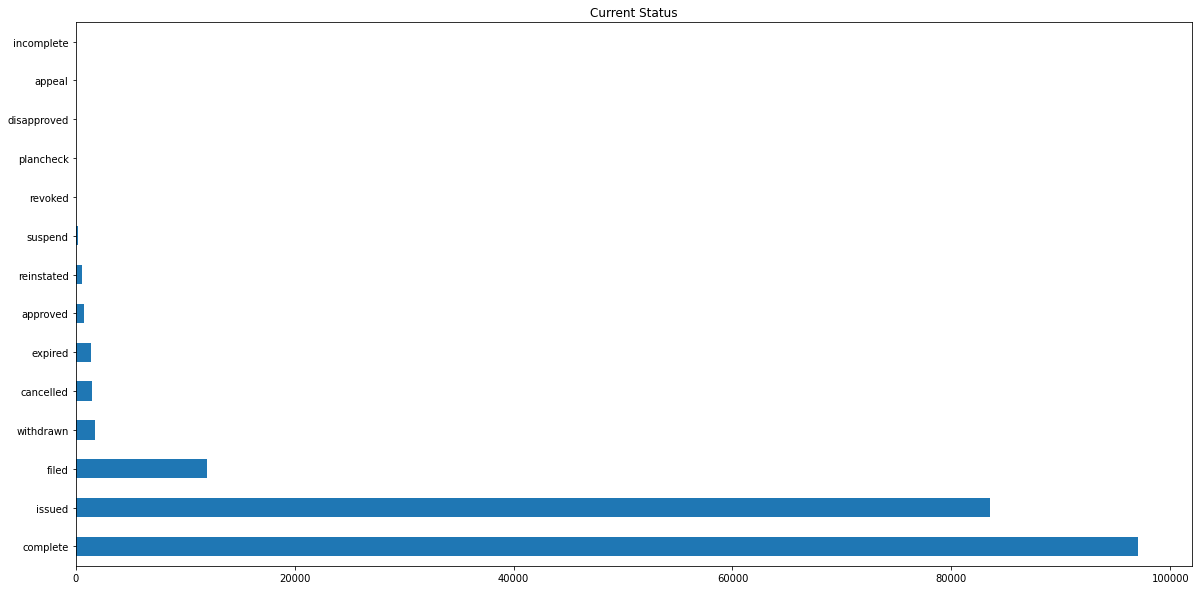

In [25]:
#Visual of Current Status
plt.figure(figsize=(20,10))
df["Current Status"].value_counts(sort=True).plot.barh()
plt.title('Current Status')

Text(0.5, 1.0, 'Permit Created Yearly')

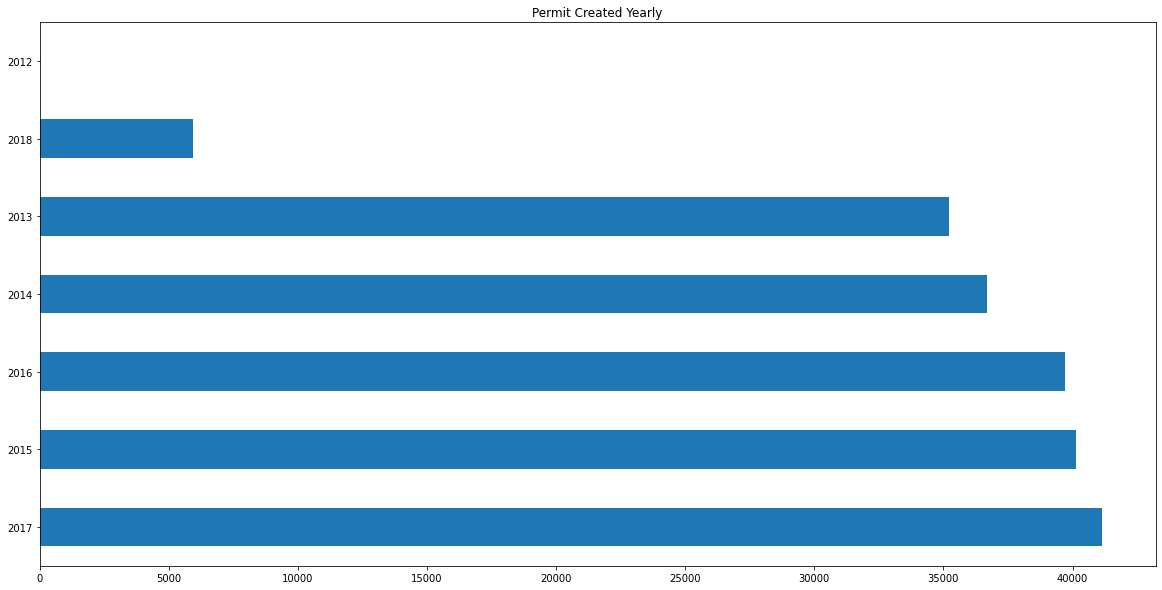

In [26]:
#Visual of Permit Created in a Year
plt.figure(figsize=(20,10))
df["year"].value_counts(sort=True).plot.barh()
plt.title('Permit Created Yearly')

Text(0.5, 1.0, 'Neighborhoods - Analysis Boundaries')

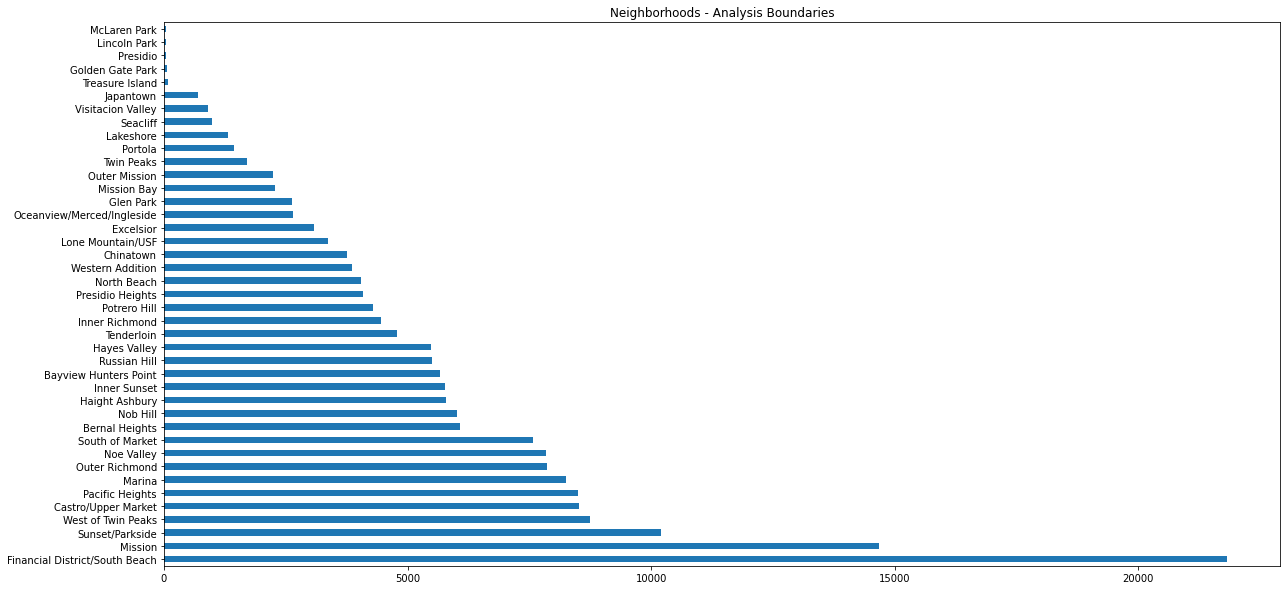

In [27]:
#Visual of Neighborhoods - Analysis Boundaries
plt.figure(figsize=(20,10))
df["Neighborhoods - Analysis Boundaries"].value_counts(sort=True).plot.barh()
plt.title('Neighborhoods - Analysis Boundaries')

In [28]:
#Renaming the Revised Cost column to be able to recall it
df.rename(columns = {"Revised Cost":"Revised_Cost"}, inplace=True)

Text(0.5, 1.0, 'Neighborhood Per Cost')

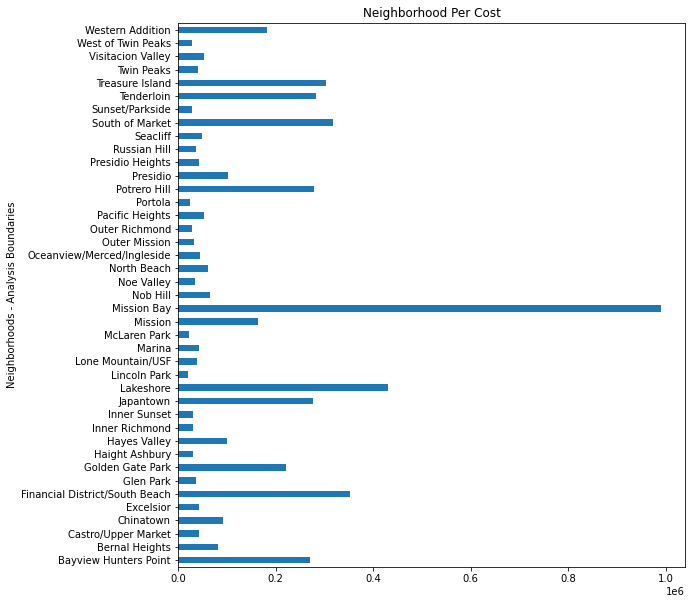

In [29]:
# Visual Analysis between Neighbourhood and Revised Cost
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df.groupby("Neighborhoods - Analysis Boundaries").Revised_Cost.mean().plot.barh()
plt.title('Neighborhood Per Cost')

Text(0.5, 1.0, 'Neighborhood per mean of days to get an issued permit')

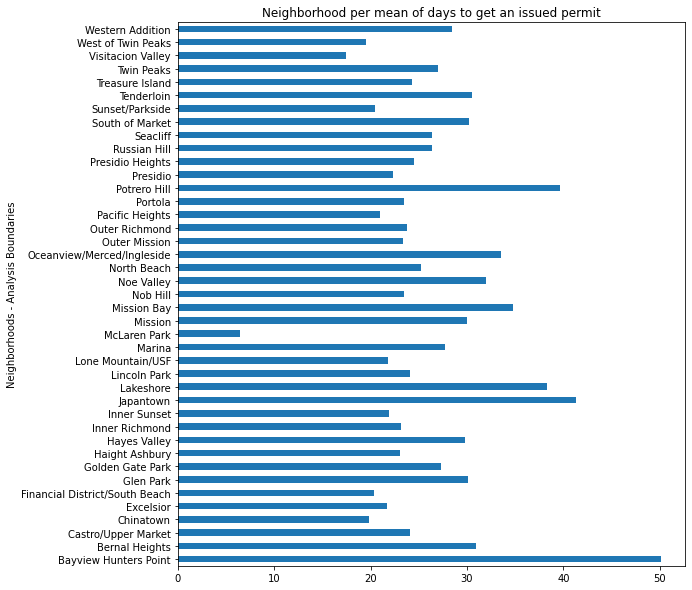

In [30]:
#Analysis comparing Neighborhoods and mean Days taken to Issue Permit 
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df.groupby("Neighborhoods - Analysis Boundaries").days_to_issue.mean().plot.barh()
plt.title('Neighborhood per mean of days to get an issued permit')

//anaconda3/envs/py38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 1.0, 'Average days to get an Issued Permit')

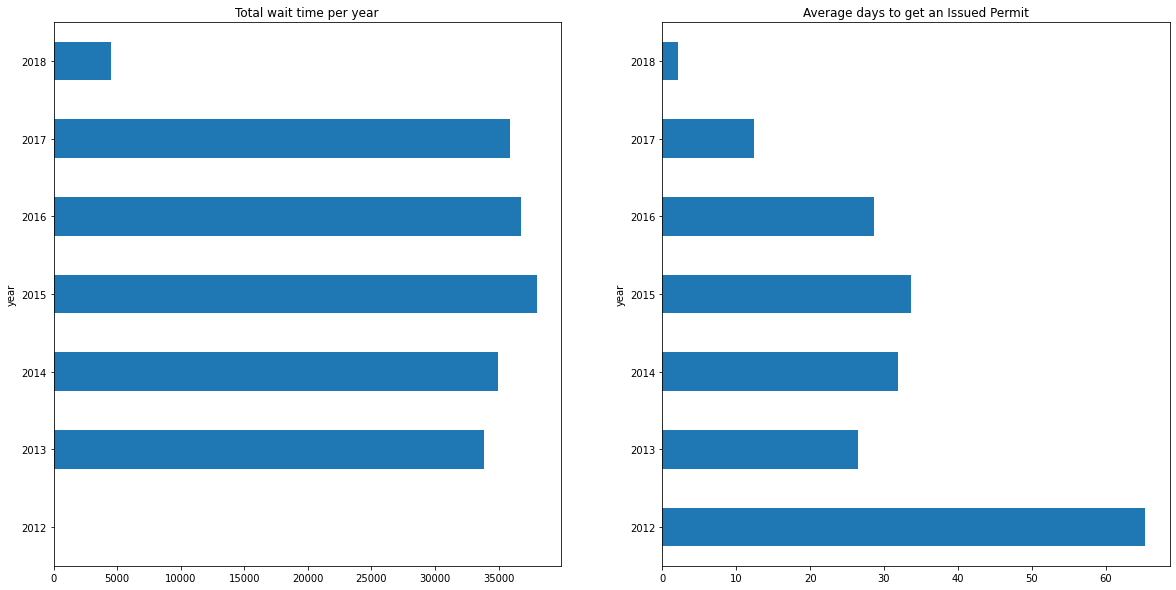

In [31]:
# A plot to show count and mean of days to get an issued permit to the specific years
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df.groupby('year').days_to_issue.count().plot.barh()
plt.title('Total wait time per year')
plt.subplot(1,2,2)
df.groupby('year').days_to_issue.mean().plot.barh()
plt.title('Average days to get an Issued Permit')

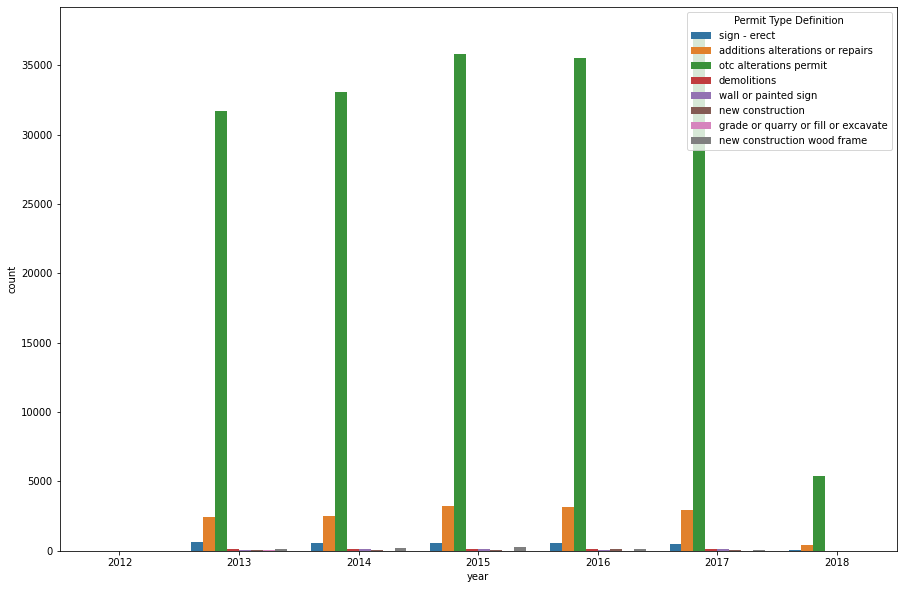

In [32]:
# A plot to compare the Permit Type Definition to specific years

plt.figure(figsize=(15,10))
ax = sns.countplot(x="year", hue="Permit Type Definition", data=df)

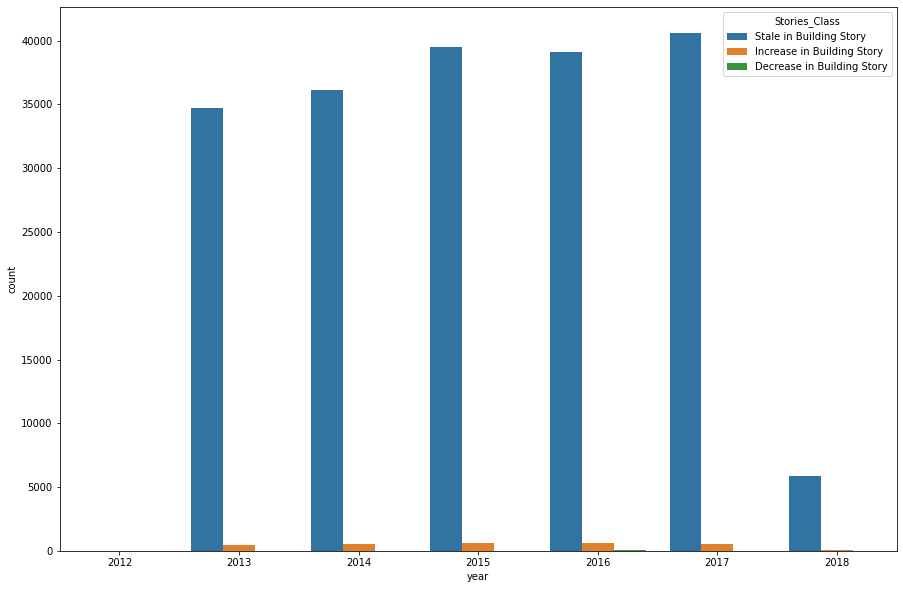

In [33]:
# A plot to compare the upgrade and Stale/Downgrade to specific years

plt.figure(figsize=(15,10))
ax = sns.countplot(x="year", hue="Stories_Class", data=df)